In [1]:
from commonfunctions import *

In [2]:
#cell for pictures insertion

rose=io.imread("color restoration testcases/Q3.jpg")
lana=io.imread("color restoration testcases/Q4.jpg")
bird=io.imread("color restoration testcases/bird.jpg")

In [3]:
def white_patch(image, percentile=100):
    """
    White balance image using White patch algorithm
    Parameters
    ----------
    image : numpy array
            Image to white balance
    percentile : integer, optional
                  Percentile value to consider as channel maximum
    clip: any value less than 0 becomes zero and any value bigger than 1 is 1

    """
    white_patch_image = img_as_ubyte((image*1.0 / np.percentile(image,percentile,axis=(0, 1))).clip(0, 1))
    return white_patch_image

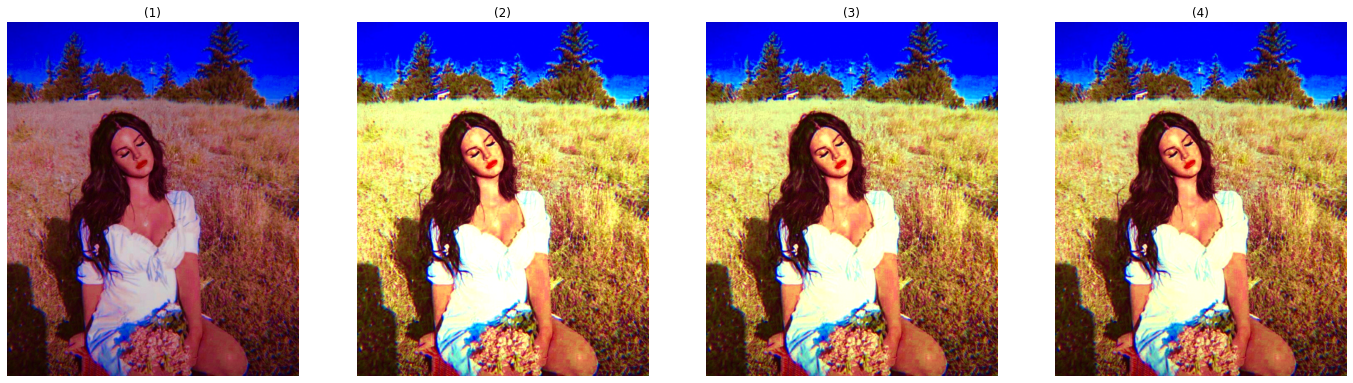

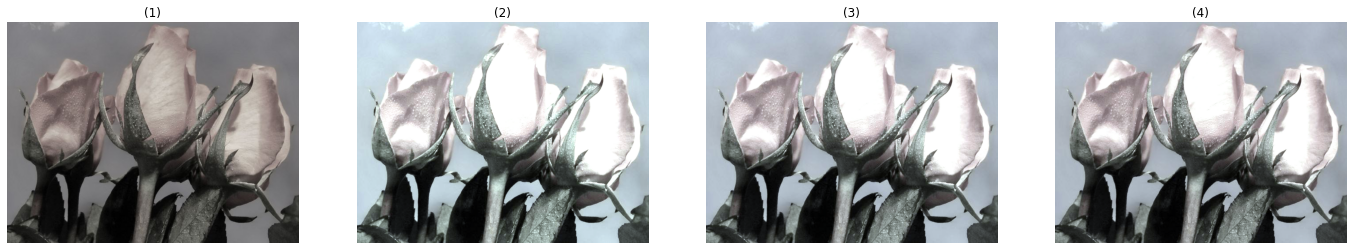

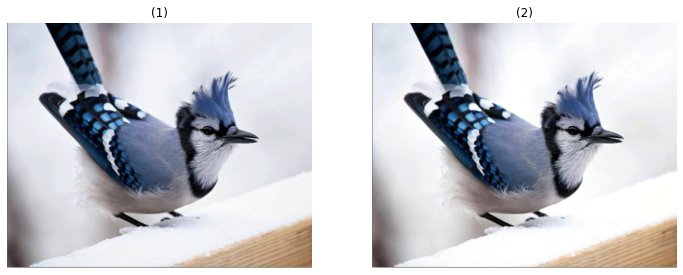

In [4]:
lanaeditwb5=white_patch(lana, 85)
lanaeditwb6=white_patch(lana, 90)
lanaeditwb7=white_patch(lana, 92)
roseeditwb5=white_patch(rose, 85)
roseeditwb6=white_patch(rose, 90)
roseeditwb7=white_patch(rose, 92)
birdeditwb7=white_patch(bird, 92)
show_images([lana, lanaeditwb5, lanaeditwb6, lanaeditwb7])
show_images([rose, roseeditwb5, roseeditwb6, roseeditwb7])
show_images([bird, birdeditwb7])

In [5]:
def gray_world(image):
    """
    White balance image using Gray-world algorithm
    Parameters
    ----------
    image : numpy array
            Image to white balance
    505050 is a shade of gray
    
    
    """
    image_grayworld = ((image * (image.mean() / 
                      image.mean(axis=(0,1)))).
                      clip(0,255).astype(int))
    # for images having a transparency channel
    
    if image.shape[2] == 4:
        image_grayworld[:,:,3] = 255
    return image_grayworld
#call the function to implement gray world algorithm
lanaeditgr=gray_world(lana)
roseeditgr=gray_world(rose)
birdeditgr=gray_world(bird)

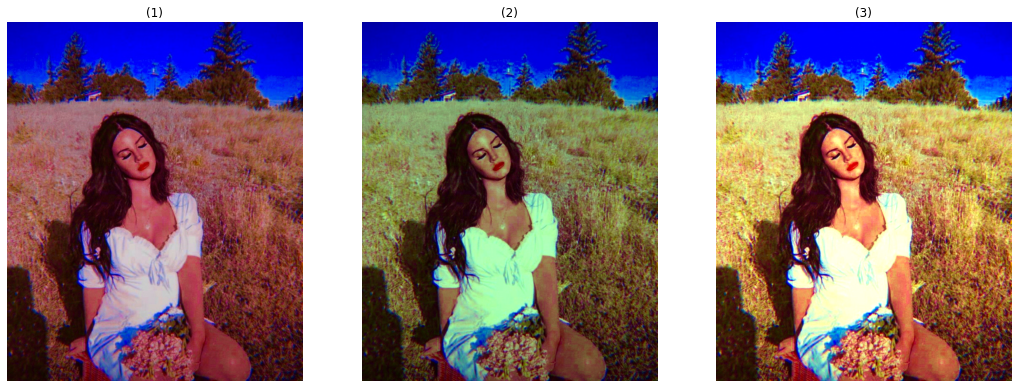

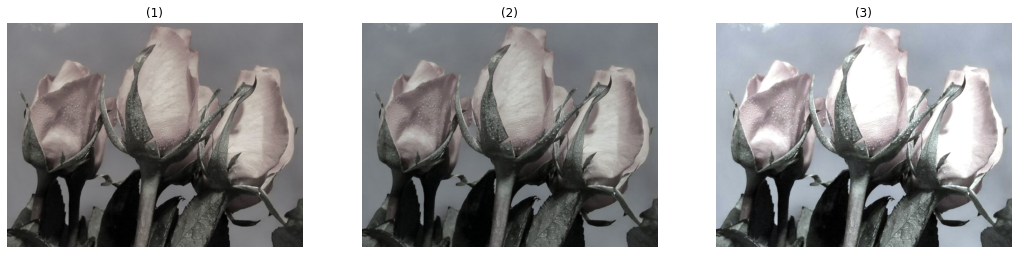

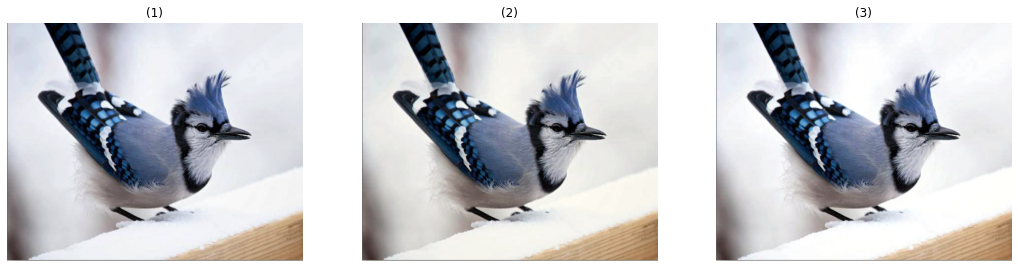

In [6]:
show_images([lana, lanaeditgr, lanaeditwb7])
show_images([rose, roseeditgr, roseeditwb7])
show_images([bird, birdeditgr, birdeditwb7])

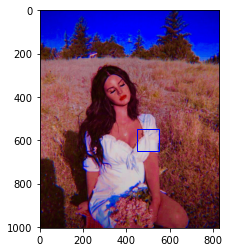

In [7]:
from matplotlib.patches import Rectangle
def addPatch(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.add_patch(Rectangle((450, 550), 100, 100, edgecolor='b', facecolor='none'))
addPatch(lana)

In [8]:
def ground_truth(image, x, y, mode='mean'):   
    """
    White balance image using Ground-truth algorithm
    Parameters
    ----------
    image : numpy array
           Image to white balancr
    x & y : image patch starting dimensions 
    mode : mean or max, optional
          Adjust mean or max of each channel to match patch
  
    Returns
    -------
   
    image_wb : numpy array
              White-balanced image
    """
    x1=x+100
    y1=y+100
    image_patch = image[x:x1,y:y1]
    if mode == 'mean':
        image_gt = ((image * (image_patch.mean() / \
                   image.mean(axis=(0, 1))))\
                   .clip(0, 255)\
                   .astype(int))
    if mode == 'max':
        image_gt = ((image * 1.0 / image_patch.max(axis=
                    (0,1))).clip(0, 1))
    #transparency channel
    if image.shape[2] == 4:
        image_gt[:,:,3] = 255
    return image_gt

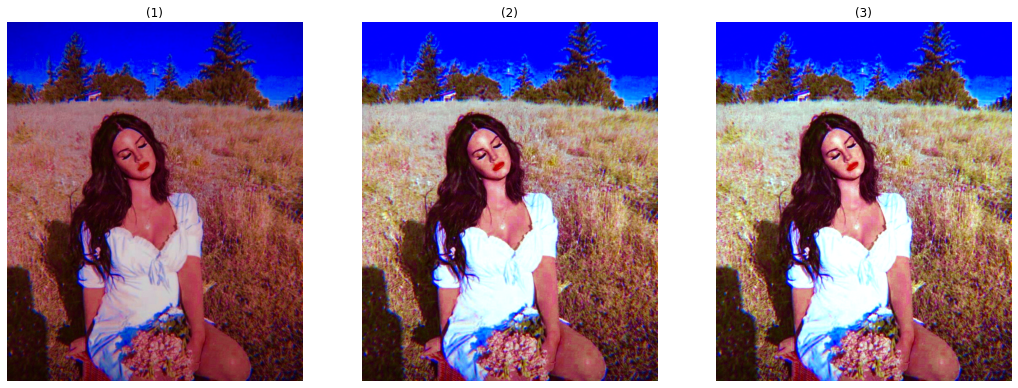

In [9]:
show_images([lana, ground_truth(lana, 650, 550, 'max'), ground_truth(lana, 450, 550, 'max')])
#show_images([rose, ground_truth(rose, 'max'), ground_truth(rose, 'mean')])
#show_images([bird, ground_truth(bird, 'max'), ground_truth(bird, 'mean')])